# Education - Labor Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as xl
# import os 
# import pathlib
from pathlib import Path

In [2]:
def get_filepath(curr_dir, folder, filename):
    """Returns the PosixPath path from the PosixPath under pathlib package.
    
    Args:
        curr_dir (Path): The current working directory as a PosixPath variable.
        folder (str): The folder containing the filename
        filename (str): The filename

    Returns:
        PosixPath:  Absolute path

    >>> get_filepath(Path.cwd(), "project_data/2019-29", "aggregate-economy-tables.xlsx")
    PosixPath('/Users/keshavelango/Desktop/Fall 2024/Big Data Algorithms/Project/project_data/2019-29/aggregate-economy-tables.xlsx')
    """
    path = curr_dir / folder / filename
    return path.resolve()

In [3]:
cwd = Path.cwd()
cwd

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks')

In [4]:
path_2019_29 = "project_data/2019-29"
path_2023_33 = "project_data/2023-33"

In [5]:
education_filename = "education.xlsx"

In [6]:
education_filename_fn_2019 = get_filepath(cwd, path_2019_29, education_filename)
education_filename_fn_2019

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks/project_data/2019-29/education.xlsx')

In [7]:
education_filename_fn_2023 = get_filepath(cwd, path_2023_33, education_filename)
education_filename_fn_2023

PosixPath('/Users/keshavelango/Documents/GitHub/big-data-algo/labour-latest/LabourData/notebooks/project_data/2023-33/education.xlsx')

In [8]:
education_2019_sheet = pd.ExcelFile(education_filename_fn_2019)

In [9]:
education_2019_sheet_names = education_2019_sheet.sheet_names

education_2019_sheet_dfs = {}

for sheet_name in education_2019_sheet_names:
    education_2019_sheet_dfs[sheet_name] = pd.read_excel(education_filename_fn_2019, sheet_name=sheet_name)

In [10]:
education_2019_sheet_dfs.keys()

dict_keys(['Index', 'Table 5.2', 'Table 5.3', 'Table 5.4'])

In [11]:
education_2019_sheet_dfs['Table 5.2'].columns = education_2019_sheet_dfs['Table 5.2'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.2'].columns

Index(['Typical entry-level education', 'Employment, 2019',
       'Employment distribution, percent, 2019',
       'Employment change, percent, 2019-29', 'Median annual wage, 2020(1)'],
      dtype='object', name=0)

In [12]:
education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].iloc[1:]

drop_theshold = int(len(education_2019_sheet_dfs['Table 5.2']) * 0.25)
education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].dropna(thresh=drop_theshold)

education_2019_sheet_dfs['Table 5.2'] = education_2019_sheet_dfs['Table 5.2'].reset_index(drop=True)
education_2019_sheet_dfs['Table 5.2']

,Typical entry-level education,"Employment, 2019","Employment distribution, percent, 2019","Employment change, percent, 2019-29","Median annual wage, 2020(1)"
0,"Total, all occupations",162795.6,100,3.7,41950
1,Doctoral or professional degree,4412.8,2.7,5.9,110200
2,Master's degree,2633.9,1.6,15,78210
3,Bachelor's degree,36864.2,22.6,6.4,77920
4,Associate's degree,3601.6,2.2,6.2,56590
5,Postsecondary nondegree award,10093.2,6.2,5.6,41520
6,"Some college, no degree",4085,2.5,-0.1,37770
7,High school diploma or equivalent,62410,38.3,1.5,39070
8,No formal educational credential,38694.8,23.8,3.3,27510


### Education 2023

In [13]:
education_2023_sheet = pd.ExcelFile(education_filename_fn_2023)
education_2023_sheet_names = education_2023_sheet.sheet_names

education_2023_sheet_dfs = {}

for sheet_name in education_2023_sheet_names:
    education_2023_sheet_dfs[sheet_name] = pd.read_excel(education_filename_fn_2023, sheet_name=sheet_name)

In [14]:
education_2023_sheet_dfs.keys()

dict_keys(['Index', 'Table 5.1', 'Table 5.2', 'Table 5.3', 'Table 5.4'])

In [15]:
education_2023_sheet_dfs['Table 5.2'].columns = education_2023_sheet_dfs['Table 5.2'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].iloc[1:]

drop_theshold = int(len(education_2023_sheet_dfs['Table 5.2']) * 0.25)
education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].dropna(thresh=drop_theshold)

education_2023_sheet_dfs['Table 5.2'] = education_2023_sheet_dfs['Table 5.2'].reset_index(drop=True)
education_2023_sheet_dfs['Table 5.2']

,Typical entry-level education,"Employment, 2023","Employment, 2033","Employment distribution, percent, 2023","Employment distribution, percent, 2033","Numeric employment change, 2023-33","Percent employment change, 2023-33","Median annual wage, dollars, 2023[1]"
0,"Total, all occupations",167849.8,174589,100,100,6739.2,4,48060
1,Doctoral or professional degree,4486.5,4804.6,2.7,2.8,318.1,7.1,124550
2,Master's degree,3668.6,4111,2.2,2.4,442.4,12.1,79840
3,Bachelor's degree,41431.7,44410,24.7,25.4,2978.3,7.2,86460
4,Associate's degree,3438.3,3653.7,2,2.1,215.4,6.3,62180
5,Postsecondary nondegree award,10383.2,11003.2,6.2,6.3,620,6,47740
6,"Some college, no degree",4241.4,4170.5,2.5,2.4,-70.9,-1.7,44130
7,High school diploma or equivalent,63066.5,64648.7,37.6,37,1582.1,2.5,45040
8,No formal educational credential,37133.6,37787.4,22.1,21.6,653.8,1.8,34430


### Employment Distribution across Educational Level 

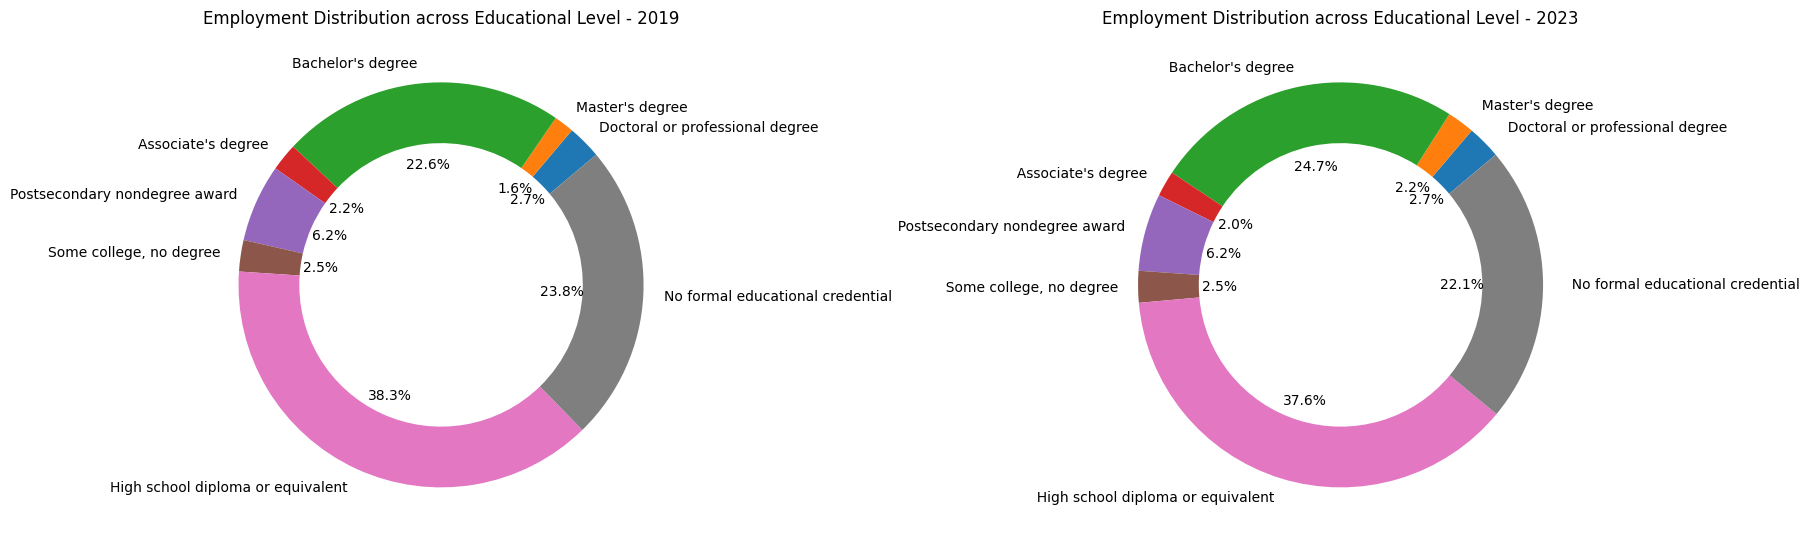

In [16]:
piechart_labels_2019 = list(education_2019_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2019 = list(education_2019_sheet_dfs['Table 5.2'].iloc[1:, 2])

piechart_labels_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 1])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,18))

ax1.pie(piechart_values_2019,labels = piechart_labels_2019,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title("Employment Distribution across Educational Level - 2019")

ax2.pie(piechart_values_2023,labels = piechart_labels_2023,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title("Employment Distribution across Educational Level - 2023")

plt.tight_layout()
plt.show()


- There seems to be a `2.1%` increase in the `Bachelor's degree` with a `0.7% decrease` in `High school diploma`.

- `Associate's degree` seems to be dropped by `0.2%` with a `Master's  degree` has jumpred by `0.6%`.

- There is a `1.6%` decrease in employment for `non formal educational credential`.

- This could be due to the effect of `COVID-19` wherein various businesses took a major hit and the shift could be due to `increase in priority for a more stable employment`.

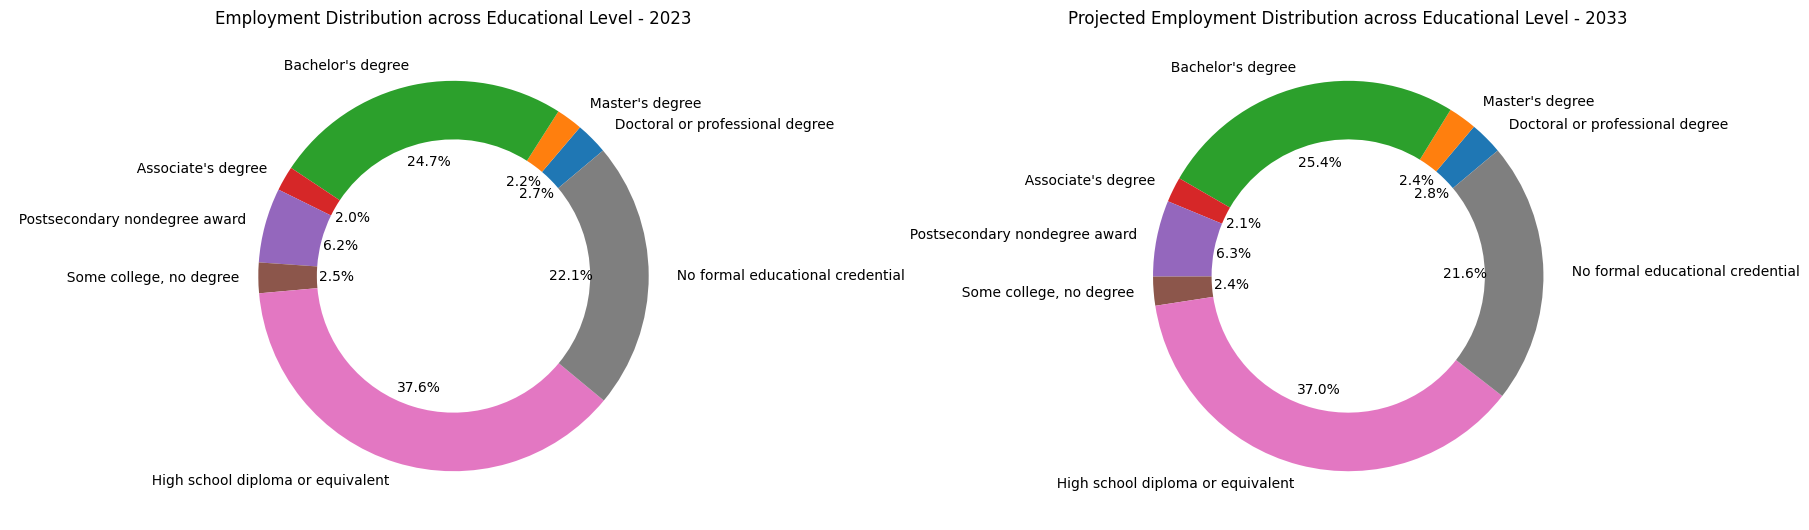

In [17]:
piechart_labels_2033 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2033 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 2])

piechart_labels_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 0])
piechart_values_2023 = list(education_2023_sheet_dfs['Table 5.2'].iloc[1:, 1])

fig, (ax2, ax1) = plt.subplots(1,2,figsize=(18,18))

ax1.pie(piechart_values_2033,labels = piechart_labels_2033,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title("Projected Employment Distribution across Educational Level - 2033")

ax2.pie(piechart_values_2023,labels = piechart_labels_2023,autopct = "%1.1f%%",startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title("Employment Distribution across Educational Level - 2023")

plt.tight_layout()
plt.show()

- Comparing `2023` and the projected stats of `2033`, there is a `0.7%` increase under `bachelor's degree`, `0.2% increase` under `master's degree`, `0.1% increase` under `Doctoral or professional degree`. 

- There is also a `0.1%` increase under `Associate's degree` .

- However there is a `0.6%` decrease in the highschool diploma, `0.1%` decrease for non degree college education, `0.6%` decrease under `no formal educational credential`

In [18]:
education_2019_sheet_dfs['Table 5.3']

,"Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
1,"Total, all occupations",00-0000,7.9,23.6,20,9.5,23.9,10.6,4.4
2,Chief executives(1),11-1011,1.6,8,13.9,4.8,41,24.1,6.5
3,General and operations managers,11-1021,2.6,16.9,24.3,10,33.4,11.1,1.7
4,Legislators(1),11-1031,1.6,8,13.9,4.8,41,24.1,6.5
...,...,...,...,...,...,...,...,...,...
791,"Material moving workers, all other(1)",53-7199,17.4,49.6,19.6,6.2,5.8,1.4,0.1
792,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,(1) This occupation is not an exact match with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,Data Source: 2019 American Community Survey Pu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
education_2019_sheet_dfs['Table 5.3'].columns = education_2019_sheet_dfs['Table 5.3'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].iloc[1:]

drop_theshold = int(len(education_2019_sheet_dfs['Table 5.3']) * 0.01)
education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].dropna(thresh=drop_theshold)

education_2019_sheet_dfs['Table 5.3'] = education_2019_sheet_dfs['Table 5.3'].reset_index(drop=True)
education_2019_sheet_dfs['Table 5.3']

,2019 National Employment Matrix title,2019 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
0,"Total, all occupations",00-0000,7.9,23.6,20,9.5,23.9,10.6,4.4
1,Chief executives(1),11-1011,1.6,8,13.9,4.8,41,24.1,6.5
2,General and operations managers,11-1021,2.6,16.9,24.3,10,33.4,11.1,1.7
3,Legislators(1),11-1031,1.6,8,13.9,4.8,41,24.1,6.5
4,Advertising and promotions managers,11-2011,1.1,1.8,10.6,6.2,65.6,12.7,2
...,...,...,...,...,...,...,...,...,...
786,"Pump operators, except wellhead pumpers(1)",53-7072,15.8,40.1,20.2,8.5,12.9,2.5,0.1
787,Wellhead pumpers(1),53-7073,15.8,40.1,20.2,8.5,12.9,2.5,0.1
788,Refuse and recyclable material collectors,53-7081,26.4,44.7,15,6.1,7.3,0.3,0.1
789,"Tank car, truck, and ship loaders(1)",53-7121,17.4,49.6,19.6,6.2,5.8,1.4,0.1


In [20]:
education_2023_sheet_dfs['Table 5.3']

,"Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2021-22",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
1,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8
2,Chief executives[1],11-1011,1.6,7.9,13.7,5.2,40,24.7,6.9
3,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6
4,Legislators[1],11-1031,1.6,7.9,13.7,5.2,40,24.7,6.9
...,...,...,...,...,...,...,...,...,...
833,"Material moving workers, all other[1]",53-7199,14.4,51.5,19.8,6.4,6.6,1,0.4
834,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,[1] This occupation is not an exact match with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,Data Source: 2021 and 2022 American Community ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
education_2023_sheet_dfs['Table 5.3'].columns = education_2023_sheet_dfs['Table 5.3'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].iloc[1:]

drop_theshold = int(len(education_2019_sheet_dfs['Table 5.3']) * 0.01)
education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].dropna(thresh=drop_theshold)

education_2023_sheet_dfs['Table 5.3'] = education_2023_sheet_dfs['Table 5.3'].reset_index(drop=True)
education_2023_sheet_dfs['Table 5.3']

,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
0,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8
1,Chief executives[1],11-1011,1.6,7.9,13.7,5.2,40,24.7,6.9
2,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6
3,Legislators[1],11-1031,1.6,7.9,13.7,5.2,40,24.7,6.9
4,Advertising and promotions managers,11-2011,1,4.2,7.8,5.2,65.2,15.2,1.4
...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers[1]",53-7072,14,45.1,25.5,6.8,7.8,0.7,0.2
829,Wellhead pumpers[1],53-7073,14,45.1,25.5,6.8,7.8,0.7,0.2
830,Refuse and recyclable material collectors,53-7081,25.2,48.8,16.1,3.7,5.2,0.7,0.4
831,"Tank car, truck, and ship loaders[1]",53-7121,14.4,51.5,19.8,6.4,6.6,1,0.4


In [22]:
education_2019_sheet_dfs['Table 5.3'].set_index('2019 National Employment Matrix title', inplace=True)
education_2023_sheet_dfs['Table 5.3'].set_index('2023 National Employment Matrix title', inplace=True)


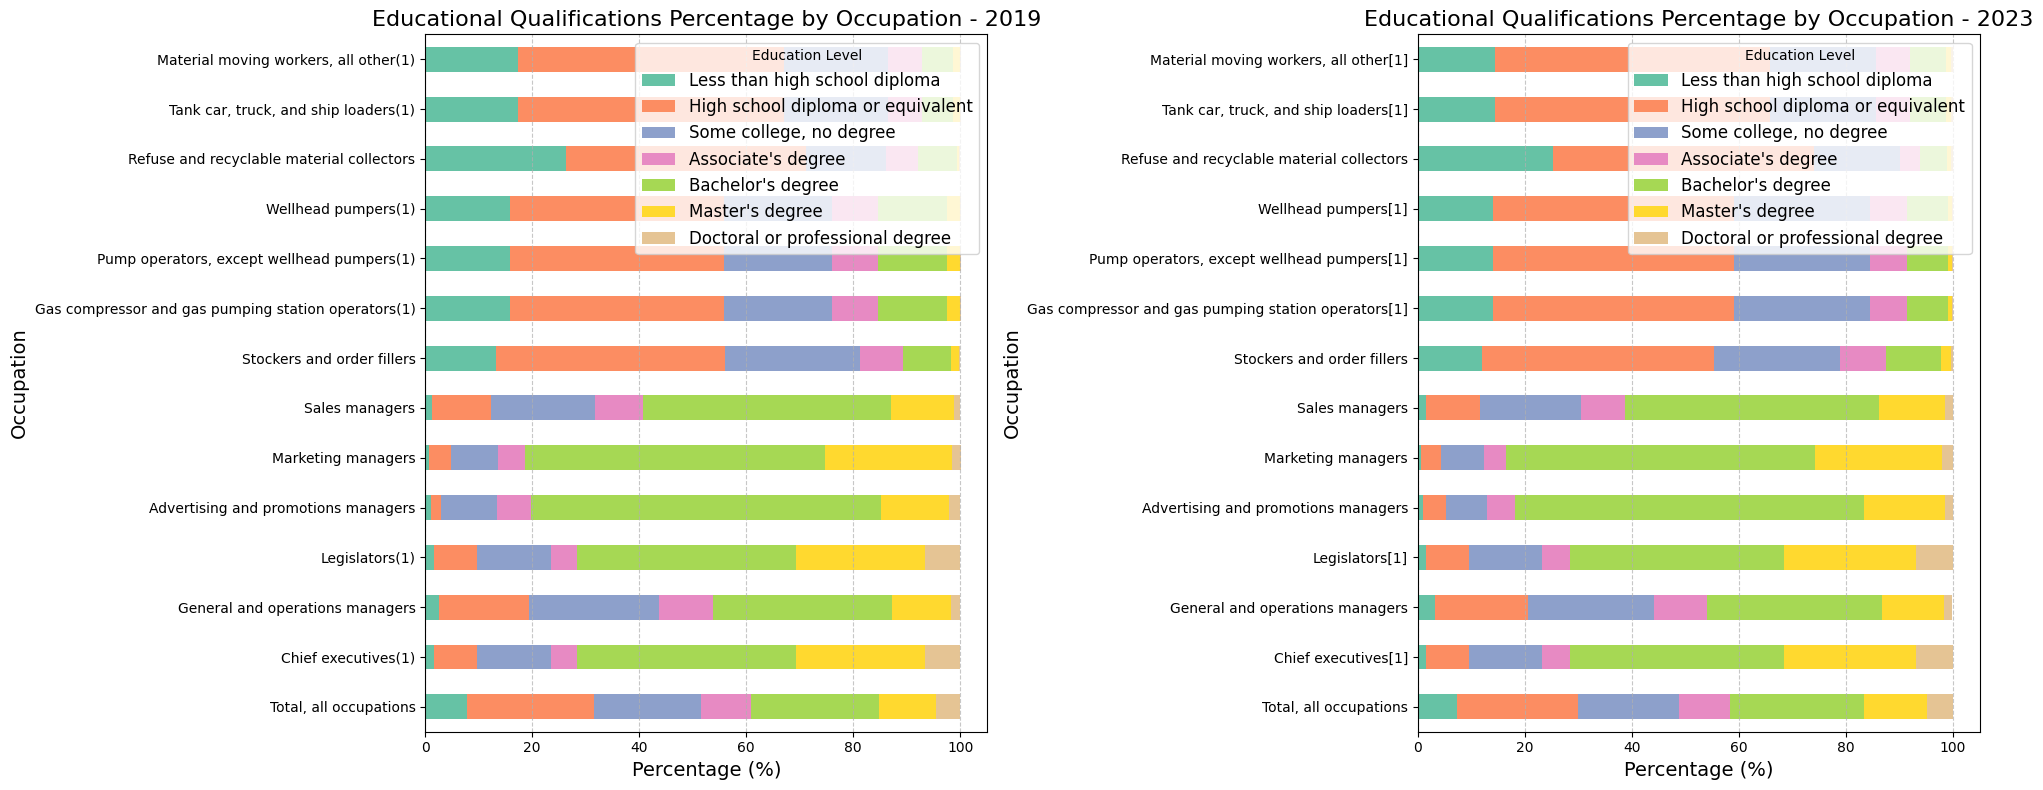

In [23]:
sns.set_palette("Set2")

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 8))

pd.concat((education_2019_sheet_dfs['Table 5.3'].head(7), education_2019_sheet_dfs['Table 5.3'].tail(7))).plot(kind='barh', stacked=True, ax = ax1)
pd.concat((education_2023_sheet_dfs['Table 5.3'].head(7), education_2023_sheet_dfs['Table 5.3'].tail(7))).plot(kind='barh', stacked=True, ax = ax2)

ax1.set_title('Educational Qualifications Percentage by Occupation - 2019',fontsize=16)
ax1.set_xlabel('Percentage (%)', fontsize=14)
ax1.set_ylabel('Occupation', fontsize=14)
ax1.legend(title='Education Level', loc='upper right', fontsize=12)
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)


ax2.set_title('Educational Qualifications Percentage by Occupation - 2023',fontsize=16)
ax2.set_xlabel('Percentage (%)', fontsize=14)
ax2.set_ylabel('Occupation', fontsize=14)
ax2.legend(title='Education Level', loc='upper right', fontsize=12)
ax2.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- The side by side stacked bar graph, depicts the `distribution of education level` across different occupations.

- The beginning of the data seems to represent the occupation title which has `more than 50% of people` having `atleast a college degree`.
- This may indicate that those specific job titles require more `advanced knowledge`.

- The data near the end seems to represent the occupation titles which have `more than 50% of people` with `atmost a highschool diploma`.
- This may suggest the job titles might be more `physical in nature`.

In [24]:
education_2019_sheet_dfs['Table 5.4'].columns = education_2019_sheet_dfs['Table 5.4'].iloc[0,:].str.strip()
education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].iloc[1:]

education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].iloc[:-1,:]

education_2019_sheet_dfs['Table 5.4'] = education_2019_sheet_dfs['Table 5.4'].reset_index(drop=True)
education_2019_sheet_dfs['Table 5.4']

,2019 National Employment Matrix title,2019 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,NaN
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN
...,...,...,...,...,...
785,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,NaN,Moderate-term on-the-job training
786,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
787,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training
788,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training


In [25]:
cols_to_replace=['Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']

education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].astype(str)
education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].map(
    lambda x: x.replace('nan','Not Available')
)
education_2019_sheet_dfs['Table 5.4'][cols_to_replace] = education_2019_sheet_dfs['Table 5.4'][cols_to_replace].astype(object)
education_2019_sheet_dfs['Table 5.4']

,2019 National Employment Matrix title,2019 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,Not Available
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,Not Available
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,Not Available
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,Not Available
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,Not Available
...,...,...,...,...,...
785,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,Not Available,Moderate-term on-the-job training
786,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
787,Refuse and recyclable material collectors,53-7081,No formal educational credential,Not Available,Short-term on-the-job training
788,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,Not Available,Short-term on-the-job training


In [26]:

education_2023_sheet_dfs['Table 5.4'].columns = education_2023_sheet_dfs['Table 5.4'].iloc[0,:].str.strip()
education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].iloc[1:]

education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].iloc[:-1,:]

education_2023_sheet_dfs['Table 5.4'] = education_2023_sheet_dfs['Table 5.4'].reset_index(drop=True)
education_2023_sheet_dfs['Table 5.4']

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,11-1011,Bachelor's degree,5 years or more,NaN,OOH Content
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN,OOH Content
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN,—
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN,OOH Content
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN,OOH Content
...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,NaN,Moderate-term on-the-job training,—
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training,—


In [27]:
cols_to_replace=['Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']

education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].astype(str)
education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].map(
    lambda x: x.replace('nan','Not Available')
)
education_2023_sheet_dfs['Table 5.4'][cols_to_replace] = education_2023_sheet_dfs['Table 5.4'][cols_to_replace].astype(object)
education_2023_sheet_dfs['Table 5.4']

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,11-1011,Bachelor's degree,5 years or more,Not Available,OOH Content
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,Not Available,OOH Content
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,Not Available,—
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,Not Available,OOH Content
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,Not Available,OOH Content
...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,Not Available,Moderate-term on-the-job training,—
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,Not Available,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,Not Available,Short-term on-the-job training,—


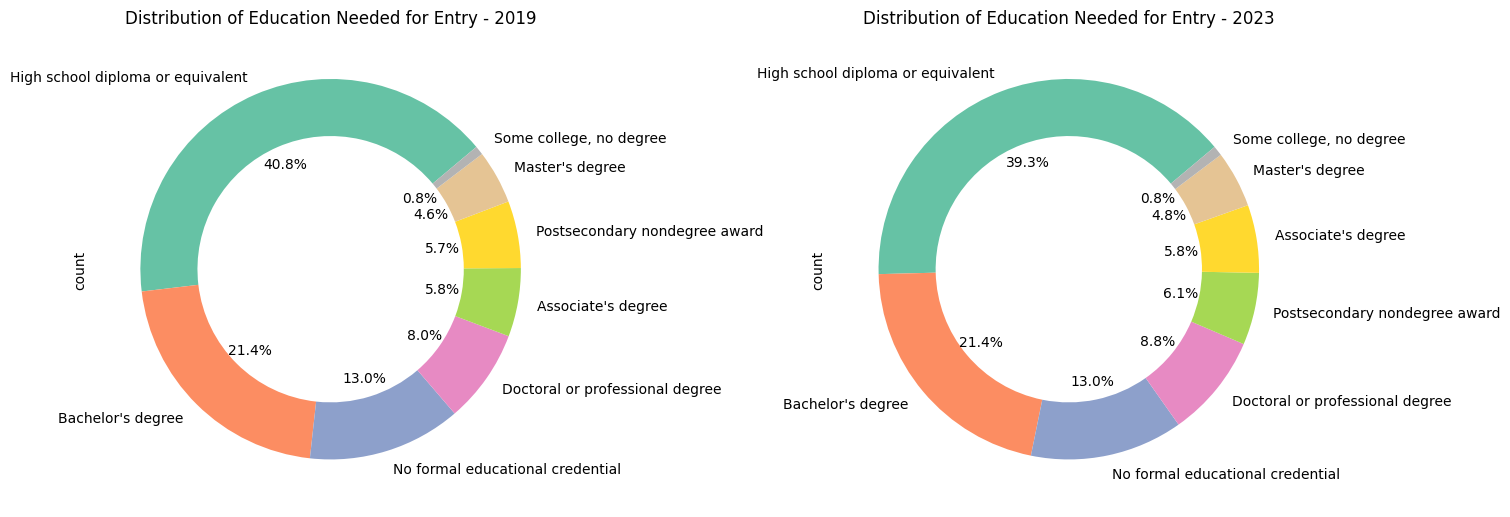

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

education_counts_2019 = education_2019_sheet_dfs['Table 5.4']['Typical education needed for entry'].value_counts()
education_counts_2019.plot(kind='pie', autopct='%1.1f%%', ax=ax1, startangle=40, wedgeprops={'width': 0.3})
ax1.set_title('Distribution of Education Needed for Entry - 2019')

education_counts_2023 = education_2023_sheet_dfs['Table 5.4']['Typical education needed for entry'].value_counts()
education_counts_2023.plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle=40, wedgeprops={'width': 0.3})
ax2.set_title('Distribution of Education Needed for Entry - 2023')

plt.tight_layout()
plt.show()


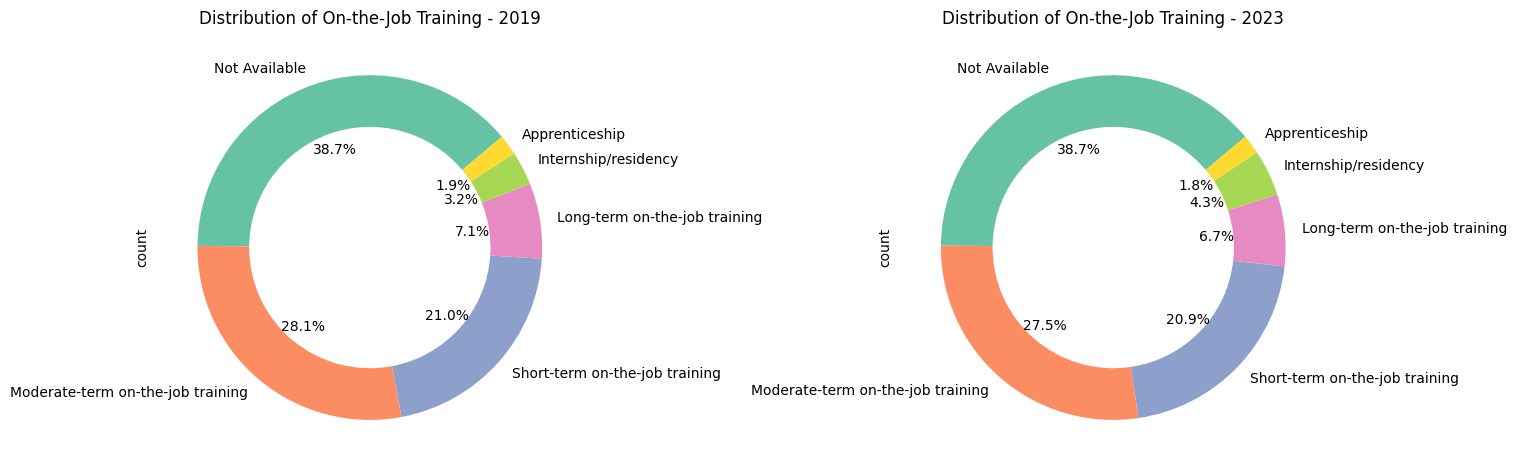

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

job_training_counts_2023 = education_2023_sheet_dfs['Table 5.4']['Typical on-the-job training needed to attain competency in the occupation'].value_counts()
job_training_counts_2023.plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle = 40, wedgeprops={'width': 0.3})
ax2.set_title('Distribution of On-the-Job Training - 2023')

job_training_counts_2019 = education_2019_sheet_dfs['Table 5.4']['Typical on-the-job training needed to attain competency in the occupation'].value_counts()
job_training_counts_2019.plot(kind='pie', autopct='%1.1f%%', ax=ax1, startangle = 40, wedgeprops={'width': 0.3})
ax1.set_title('Distribution of On-the-Job Training - 2019')

plt.tight_layout()
plt.show()

In [30]:
# Matrix code 

In [31]:
education_2023_5_4 = education_2023_sheet_dfs['Table 5.4']
education_2019_5_4 = education_2019_sheet_dfs['Table 5.4']

education_2023_5_4.to_excel("education_2023_5_4.xlsx", index=False)
education_2019_5_4.to_excel("education_2019_5_4.xlsx", index=False)